# Differentiable Physics Model: Lorenz 63


In [19]:
import sys, os
from pyprojroot import here

# spyder up to find the root
root = here(project_files=[".home"])

# append to path
sys.path.append(str(root))

In [20]:
import pytreeclass as pytc
import jax.numpy as jnp
import jax
from jax.experimental.ode import odeint

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

from lib._src.dynamical.base import DynamicalSystem
from lib._src.dynamical.l63 import Lorenz63

sns.reset_defaults()
sns.set_context(context="talk", font_scale=0.7)
%matplotlib inline
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dynamical System

* Equation of Motion
* Observation Operator
* Integrate

### Equation of Motion

$$
\begin{aligned}
\frac{dx}{dt} &= \sigma (y - x) \\
\frac{dy}{dt} &= x (\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{aligned}
$$

where $(\sigma,\rho,\beta)$ are hyperparameters.

In [21]:
s, r, b = 10, 28, 2.667
dt = 0.01
t0 = 0.0
t1 = 30.0
observe_every = 10
n_steps = len(jnp.arange(t0, t1, dt)) 


# define dynamical system
model = Lorenz63(
    dt=dt,
    observe_every=observe_every,
    s=s, r=r, b=b
)

# initialize trajectory
x0 = model.init_x0(0.01)

# perform integration (warmup)
x_warmup = model.warmup(x0, n_steps)
assert x_warmup.shape == (3,)

# perform integration
x, t = model.integrate(x_warmup, n_steps)
assert x.shape == (n_steps, 3)

# do observation operator
y, t_obs = model.observe(x, n_steps)

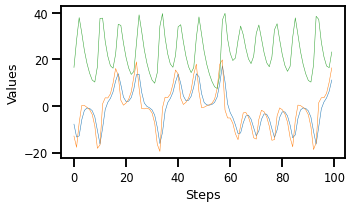

In [22]:
fig, ax = plt.subplots(figsize=(5,3))

ax.plot(y[-100:], lw=0.5)
ax.set_xlabel("Steps")
ax.set_ylabel("Values")
plt.tight_layout()
plt.show()

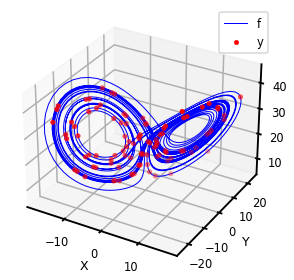

In [23]:
ax = plt.figure().add_subplot(projection="3d")

ax.plot(*x.T, lw=1.0, color="blue", label="f")
ax.scatter3D(*y[-100:].T, lw=0.5, color="red", label="y")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
import jax.random as jrandom

key = jrandom.PRNGKey(seed=123)

In [25]:
n_batches = 32
s, r, b = 10, 28, 2.667
dt = 0.01
t0 = 0.0
t1 = 30.0
observe_every = 10
n_steps = len(jnp.arange(t0, t1, dt)) 
n_warmup_steps = 1000


# define dynamical system
model = Lorenz63(
    dt=dt,
    observe_every=observe_every,
    s=s, r=r, b=b
)


# initialize batch
x0 = model.init_x0_batch(n_batches, 0.01)


# perform integration (warmup, batches)
x_warmup = model.batch_warmup(x0, n_warmup_steps)
assert x_warmup.shape == (n_batches, 3)

# perform integration (batches)
x, t = model.batch_integrate(x_warmup, n_steps)
assert x.shape == (n_batches, n_steps, 3)

# do observation operator
y, t_obs = model.batch_observe(x, n_steps)


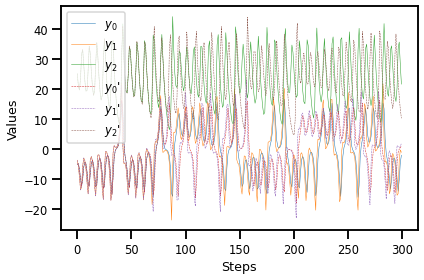

In [26]:
fig, ax = plt.subplots()

ax.plot(y[30], linewidth=0.5, label=["$y_0$", "$y_1$", "$y_2$"])
ax.plot(y[100], linewidth=0.5, linestyle="--", label=["$y_0$'", "$y_1$'", "$y_2$'"])
ax.set_xlabel("Steps")
ax.set_ylabel("Values")
plt.legend()
plt.tight_layout()
plt.show()

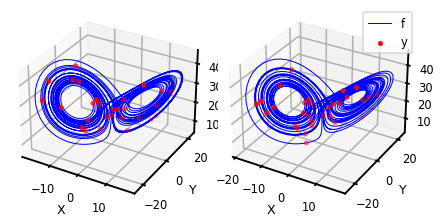

In [27]:
fig = plt.figure()

ax = fig.add_subplot(1,2,1, projection="3d")

ax.plot(*x[30].T, lw=1.0, color="blue")
ax.scatter3D(*y[30, ::10].T, lw=0.5, color="red")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax = fig.add_subplot(1,2,2, projection="3d")
ax.plot(*x[100].T, lw=1.0, color="blue", label="f")
ax.scatter3D(*y[100, ::10].T, lw=0.5, color="red", label="y")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.legend()
plt.tight_layout()
plt.show()